# Investment Analysis Assignment 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np


In [2]:
#To check the encoding type of the csv file, import chardet
import chardet
with open('companies.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(100))
    
print(result)

companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
# companies = pd.read_csv("companies.csv",encoding='latin1')

In [4]:
# read all three csv files with proper encoding
companies = pd.read_csv("companies.csv",encoding='latin1')
rounds2 = pd.read_csv("rounds2.csv",encoding='latin1')
mapping = pd.read_csv("mapping.csv",encoding='latin1')

In [5]:
# list the columns in companies dataframe
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [6]:
# convert the permalink to lowercase in companies dataframe
companies.permalink = companies.permalink.str.lower()
companies.name = companies.name.str.lower()

In [7]:
# convert the company_permalink to lowercase in rounds2 dataframe
rounds2.company_permalink = rounds2.company_permalink.str.lower()

### Checkpoint 1

In [8]:
# list unique companies from rounds2
len(rounds2.company_permalink.unique())

66370

In [9]:
# list unique companies from companies
len(companies.permalink.unique())

66368

In [10]:
#master_frame = pd.merge(companies,rounds2,how='left',left_on='permalink',right_on='company_permalink')

In [11]:
master_frame = pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

In [12]:
# shape of master_frame
master_frame.shape

(114949, 16)

### Checkpoint 2

In [13]:
# check missing values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [14]:
# % of missing values per feature/column of total number of values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [15]:
master_frame.raised_amount_usd.isnull().sum()

19990

In [16]:
# ignore the records where raised_amount_usd is null
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull())]

In [17]:
master_frame.raised_amount_usd.isnull().sum()

0

In [18]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [19]:
master_frame.shape

(94959, 16)

In [20]:
# drop the columns which are not required & has null values
master_frame = master_frame.drop('funding_round_code',axis=1)
master_frame = master_frame.drop('homepage_url',axis=1)

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [22]:
# drop founded_at column
master_frame = master_frame.drop('founded_at',axis=1)

In [23]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [24]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [25]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [26]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [27]:
# types of founding_round_type
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [28]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [29]:
master_frame_funding_type = master_frame.groupby('funding_round_type')

In [30]:
# mean of raised_amount_usd & sorting it in descending order
master_frame_funding_type['raised_amount_usd'].mean().sort_values(ascending=False)


funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

From the above analysis it looks like 5-15 million was invested in <b>Venture</b> funds & Spark Funds should also invest in same.

### Checkpoint 3

Analysing the top 3 English-speaking countries

In [31]:
venture_df = master_frame[master_frame.funding_round_type == 'venture']

In [32]:
venture_df.shape

(47809, 13)

In [33]:
# listing top 9 countries which have received highest funding
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [34]:
# top9 dataframe with data of top 9 countries based on investment
top9 = venture_df[venture_df['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [35]:
top9.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list                0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
dtype: int64

In [36]:
top9.category_list.value_counts()

Biotechnology                                                                                              5100
Software                                                                                                   3731
Health Care                                                                                                1325
Clean Technology                                                                                           1181
Enterprise Software                                                                                        1113
                                                                                                           ... 
Collaboration|File Sharing|Messaging                                                                          1
Hardware + Software|Health Care Information Technology|Health Diagnostics|Medical Devices|Mobile Health       1
Business Development|Business Intelligence|Enterprise Software                                          

In [37]:
# split the category_list if it has ''
top9['primary_sector'] = top9['category_list'].astype(str).apply(lambda x:x.split('|')[0])

C:\Users\Shrikant\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
top9.primary_sector.value_counts()

Biotechnology               6413
Software                    3859
Advertising                 2061
Health Care                 1741
Enterprise Software         1688
                            ... 
Mechanical Solutions           1
Specialty Retail               1
Online Video Advertising       1
Retail Technology              1
Clean Technology IT            1
Name: primary_sector, Length: 587, dtype: int64

In [39]:
top9.shape

(44118, 14)

In [40]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


In [41]:
# remove null entries from mapping dataframe
mapping = mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [42]:
# function to replace the '0' with 'Na' in mapping dataframe
def cleanMapping(category):
    if '0' in category:
        if category.startswith('0'):
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith('0'):
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category
    

In [43]:
# call cleanMapping function  
mapping['category_list'] = list(map(cleanMapping,mapping['category_list']))

In [44]:
m=pd.melt(mapping,id_vars=['category_list'],var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [45]:
top9 = pd.merge(top9,m,how='left',left_on='primary_sector',right_on='category_list')

In [46]:
top9 = top9.drop('category_list_y',axis=1)

In [47]:
top9.main_sector.head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

In [48]:
top9.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
primary_sector               0
main_sector                 12
dtype: int64

In [49]:
top9 = top9[~top9.main_sector.isnull()]

In [50]:
top9.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
primary_sector               0
main_sector                  0
dtype: int64

Analysis of top 3 companies where English is official language and venture investment is between 5-15 million USD

##### for USA

In [51]:
df_USA = top9[top9.country_code == 'USA']

In [52]:
df_USA.shape

(35933, 15)

In [53]:
df_USA.raised_amount_usd.sum()

419853112599.0

In [54]:
# move the data where raised_amount_usd is between 5 & 15 million
df_USA = df_USA[(df_USA.raised_amount_usd >= 5000000) & (df_USA.raised_amount_usd <= 15000000)]

In [55]:
df_USA.raised_amount_usd.sum()

107757097294.0

In [56]:
df_USA.raised_amount_usd.count()

12063

In [57]:
df_USA_by_sector = df_USA.groupby('main_sector')

In [58]:
df_USA_by_sector.raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [59]:
# highest invested company in 'Others'(Top sector)
df_USA[df_USA['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [60]:
# df_USA[df_USA['main_sector'] =='Others']
# df_USA[df_USA.main_sector=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

In [61]:
# highest invested company in 2nd top sector
df_USA[df_USA.main_sector=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

##### for GBR

In [62]:
# dataframe for United Kingdom where investment is in between 5-15 million
df_GBR= top9[top9.country_code=='GBR']
df_GBR = df_GBR[(df_GBR.raised_amount_usd >= 5000000) & (df_GBR.raised_amount_usd <= 15000000)]
df_GBR.shape

(621, 15)

In [63]:
df_GBR.raised_amount_usd.sum()

5379078691.0

In [64]:
df_GBR_by_sector = df_GBR.groupby('main_sector')

In [65]:
# top sectors
df_GBR_by_sector.raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [66]:
# top company in sector 'Others'
df_GBR[df_GBR.main_sector=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [67]:
# top company in sector 'Social, Finance, Analytics, Advertising'
df_GBR[df_GBR.main_sector=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

##### for IND

In [68]:
# dataframe for India where investment is between 5-15 million USD
df_IND = top9[top9.country_code=='IND']
df_IND = df_IND[(df_IND.raised_amount_usd >= 5000000) & (df_IND.raised_amount_usd <= 15000000)]
df_IND.shape

(328, 15)

In [69]:
df_IND.raised_amount_usd.sum()

2949543602.0

In [70]:
df_IND_by_sector = df_IND.groupby('main_sector')

In [71]:
# top sectors
df_IND_by_sector.raised_amount_usd.count().sort_values(ascending=False).head()

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [72]:
# top company in 'Others' category
df_IND[df_IND.main_sector=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [73]:
# top company in 'Social, Finance, Analytics, Advertising'
df_IND[df_IND.main_sector=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

#### Checkpoint 6

In [74]:
# importing necessary libraries for plottign graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

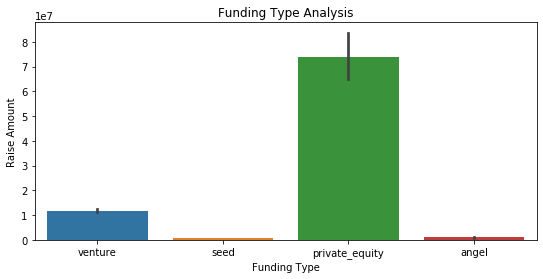

In [75]:
# barplot for funding type
plt.figure(figsize=(9,4))
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.xlabel('Funding Type')
plt.ylabel('Raise Amount')
plt.title('Funding Type Analysis')
plt.show()

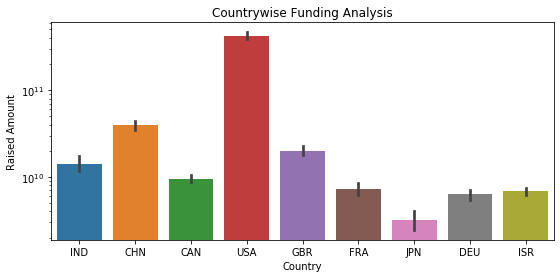

In [76]:
# countrywise funding analysis
plt.figure(figsize=(9,4))
a = sns.barplot(x='country_code',y='raised_amount_usd',data=top9,estimator=np.sum)
a.set_yscale('log')
a.set(xlabel='Country',ylabel='Raised Amount')
plt.title('Countrywise Funding Analysis')
plt.show()

In [77]:
master_top3 = df_USA[df_USA['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [78]:
master_top3.shape

(8014, 15)

In [79]:
master_top3=master_top3.append(df_GBR[df_GBR['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])],ignore_index=True)

In [80]:
master_top3.shape

(8424, 15)

In [81]:
master_top3=master_top3.append(df_IND[df_IND['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])],ignore_index=True)

In [82]:
master_top3.shape

(8646, 15)

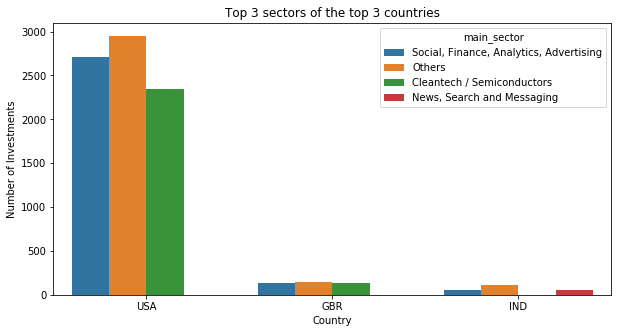

In [88]:
# top 3 countries with sectorwise plot
plt.figure(figsize=(10,5))
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=master_top3,estimator=lambda x: len(x))
plt.title('Top 3 sectors of the top 3 countries')
plt.xlabel('Country')
plt.ylabel('Number of Investments')
plt.show()